<a href="https://colab.research.google.com/github/foxtrotmike/PCA-Tutorial/blob/master/Eigen.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Valores y Vectores Propios (Eigen)
### Por
## Fayyaz Minhas

La descomposición en valores propios (eigen) es uno de los enfoques más utilizados en el análisis de matrices en Álgebra Lineal. En este breve tutorial, buscamos entender cómo funciona.

La multiplicación de una matriz por un vector puede interpretarse como una transformación del punto representado en el vector: $\mathbf y =\mathbf A\mathbf x$. Aquí, el punto $\mathbf x$ ha sido transformado a $\mathbf y$ mediante su multiplicación con la matriz $\mathbf A$. La transformación puede ser un escalamiento, cizallamiento o proyección, etc., lo que puede cambiar la dirección del punto $\mathbf x$, es decir, los vectores de dirección de $\mathbf x$ y $\mathbf y$ pueden ser diferentes. Sin embargo, existen algunos puntos "característicos" $\mathbf v$ asociados con la matriz, que solo sufren un cambio de escala, es decir, $\mathbf w =\mathbf A\mathbf v = \lambda \mathbf v$. Como $\mathbf w = \lambda \mathbf v$,  $\mathbf w$ y $\mathbf v$ son paralelos o antiparalelos entre sí, con solo un escalamiento por un factor multiplicativo $\lambda$ resultante de la transformación. Tales puntos o vectores se llaman vectores propios ("eigen" significa "característico" en alemán), mientras que los escalares asociados se llaman valores propios.

A continuación, ilustramos esto en Python con un ejemplo simple. Tomamos 4 puntos en los ejes canónicos y usamos una matriz para transformar estos puntos: $\mathbf q_i = \mathbf T \mathbf p_i$. Observa que para la matriz original, los vectores de dirección de los cuatro puntos solo sufren un escalamiento (por 2). ¿Puedes identificar cuáles puntos son los vectores propios de la matriz dada? ¿Cuáles son sus valores propios correspondientes?

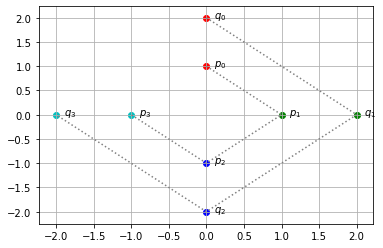

In [4]:
import matplotlib.pyplot as plt  
import numpy as np  
import string
color_lut = 'rgbc'

# create the scaling transformation matrix
T = np.array([[2, 0], [0, 2]])
#T = np.random.randn(2,2)

a, b, c, d = (0, 1), (1, 0), (0, -1), (-1, 0)
# matrix with row vectors of points
X = np.vstack([a, b, c, d])

# Some plotting functions
def showPoints(A,head='p'):
    for i,xy in enumerate(A[:,:2]):
        x,y = xy
        plt.scatter(x, y, color=color_lut[i])
        plt.text(x + 0.1, y, '$'+head+'_'+str(int(i))+'$')
    plt.plot(A[:,0],A[:,1],color="gray", linestyle='dotted')
def showV(V,linestyle=None):
    for i in range(V.shape[1]):
        plt.arrow(0,0,0.8*V[0,i],0.8*V[1,i],color=color_lut[i],head_width=0.1,linestyle=linestyle)


showPoints(X)
showPoints((T@X.T).T,head = "q")
plt.grid();plt.show()

Vamos a encontrar los valores propios y los vectores propios de la matriz dada y graficarlos sobre la gráfica anterior.

Original matrix:
 [[2 0]
 [0 2]]
Eigen values: [2. 2.]
Eigen Vectors:
 [[1. 0.]
 [0. 1.]]


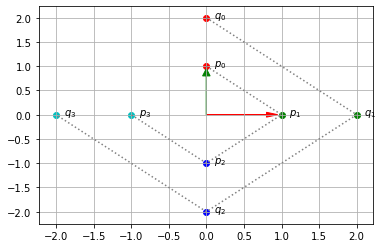

In [5]:
e,V = np.linalg.eig(T)
print("Original matrix:\n",T)
print("Eigen values:",e)
print("Eigen Vectors:\n",V)
showPoints(X)
showPoints((T@X.T).T,head = "q")
showV(V)
plt.grid();plt.show()

Observa que hay dos vectores propios que corresponden a las columnas de la matriz V. Además, nota que los vectores propios son vectores unitarios (con norma 1.0). Asimismo, los dos vectores propios son paralelos a los puntos $p_0$ y $p_1$. ¿Puedes pensar por qué?

Para verificar que la transformación de la matriz solo escala los vectores propios y que además lo hace por la cantidad dictada por sus valores propios, vamos a graficar los vectores propios originales y los puntos resultantes de transformar estos puntos por multiplicación matricial: $\mathbf w_i = \mathbf T \mathbf v_i$.

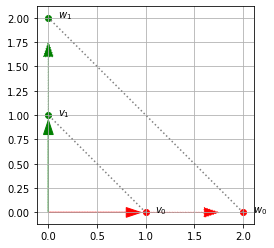

In [7]:
plt.figure()
showV(V)
showV(T@V,linestyle='dotted')
showPoints(V.T,head='v')
showPoints((T@V).T,head='w')
plt.grid();plt.axis('square');plt.show()

Observa que en la gráfica anterior los puntos solo sufren un escalamiento de 2.0. Así, estos vectores propios (y sus valores propios) son una característica de la matriz dada. Si la matriz cambia, los vectores y valores propios resultantes serán diferentes, como se muestra a continuación.

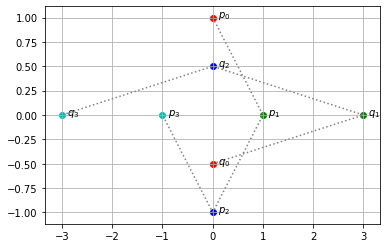

In [8]:
T = np.array([[3, 0], [0, -0.5]])
showPoints(X)
showPoints((T@X.T).T,head = "q")
plt.grid();plt.show()

¿Puedes identificar los vectores propios y sus valores propios correspondientes en la gráfica anterior?

Puedes mirar abajo si quieres ver la respuesta.

Original matrix:
 [[ 3.   0. ]
 [ 0.  -0.5]]
Eigen values: [ 3.  -0.5]
Eigen Vectors:
 [[1. 0.]
 [0. 1.]]


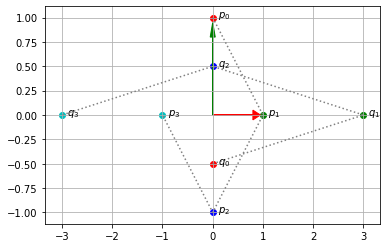

In [9]:
e,V = np.linalg.eig(T)
print("Original matrix:\n",T)
print("Eigen values:",e)
print("Eigen Vectors:\n",V)
showPoints(X)
showPoints((T@X.T).T,head = "q")
showV(V)
plt.grid();plt.show()

Los dos vectores propios son paralelos a los puntos $p_0$ y $p_1$. ¿Puedes pensar por qué?

Graficamos los puntos originales y los vectores propios transformados abajo para su verificación.

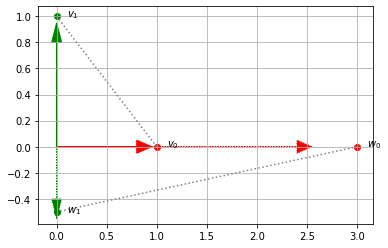

In [10]:
plt.figure()
showV(V)
showV(T@V,linestyle='dotted')
showPoints(V.T,head='v')
showPoints((T@V).T,head='w')
plt.grid();plt.show()

Observa que los puntos propios solo sufren un escalamiento. Sin embargo, la dirección de uno de los puntos cambia ya que el factor de escala es negativo.

Hagámoslo para otra matriz.

Original matrix:
 [[3 1]
 [0 2]]
Eigen values: [3. 2.]
Eigen Vectors:
 [[ 1.         -0.70710678]
 [ 0.          0.70710678]]


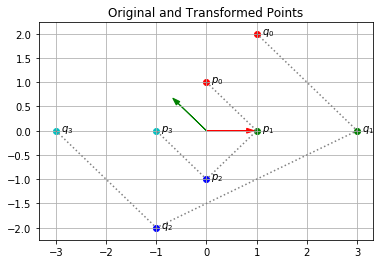

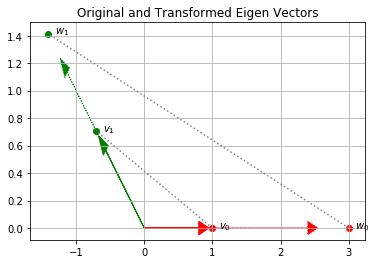

In [11]:
T = np.array([[3, 1], [0, 2]])
e,V = np.linalg.eig(T)
print("Original matrix:\n",T)
print("Eigen values:",e)
print("Eigen Vectors:\n",V)
showPoints(X)
showPoints((T@X.T).T,head = "q")
showV(V)
plt.title("Original and Transformed Points")
plt.grid();plt.show()
plt.figure()
showV(V)
showV(T@V,linestyle='dotted')
showPoints(V.T,head='v')
showPoints((T@V).T,head='w')
plt.title("Original and Transformed Eigen Vectors")
plt.grid();plt.show()

Puedes tomar más puntos y jugar con el código para desarrollar una mejor comprensión de los vectores y valores propios.

## Descomposición en valores propios (Eigen Decomposition)

Nota que dado que:

$\mathbf w_i = \mathbf T \mathbf v_i = \lambda_i \mathbf v_i$

Por lo tanto, si $\mathbf V = [\mathbf v_1 | \mathbf v_2, ... | \mathbf v_k]$ y $\mathbf\Lambda$ es una matriz diagonal de valores propios, entonces:

$\mathbf T \mathbf V= \mathbf V \mathbf\Lambda$

Así,

$\mathbf T =\mathbf V \mathbf \Lambda \mathbf V^{-1}$

Por lo tanto, la matriz original puede escribirse en términos de sus valores y vectores propios, lo que se llama su descomposición en valores propios.

In [12]:
print("Original matrix:\n",T)
print("Original matrix reconstructed from Eigen Decomposition:\n",V@np.diag(e)@np.linalg.inv(V))

Original matrix:
 [[3 1]
 [0 2]]
Original matrix reconstructed from Eigen Decomposition:
 [[3. 1.]
 [0. 2.]]


## Referencias y lecturas adicionales
[Valores y vectores propios (Wikipedia)](https://es.wikipedia.org/wiki/Valores_y_vectores_propios)

[Descomposición en valores propios de una matriz (Wikipedia)](https://es.wikipedia.org/wiki/Descomposici%C3%B3n_en_valores_propios_de_una_matriz)